In [21]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [24]:
data = pd.read_csv('D:/Desktop/Projetos/Bancos_de_dados/titanic/train.csv')

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

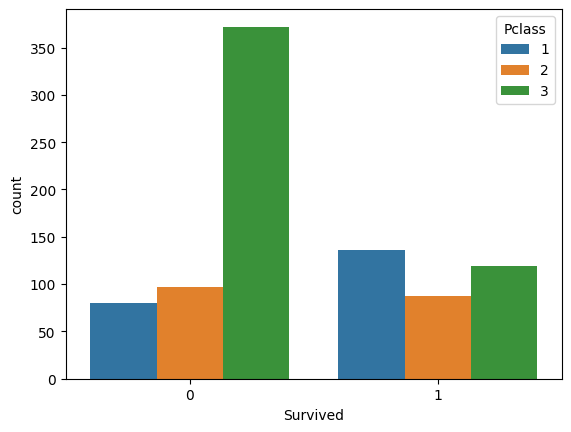

In [27]:
sns.countplot(x='Survived',hue='Pclass', data=data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

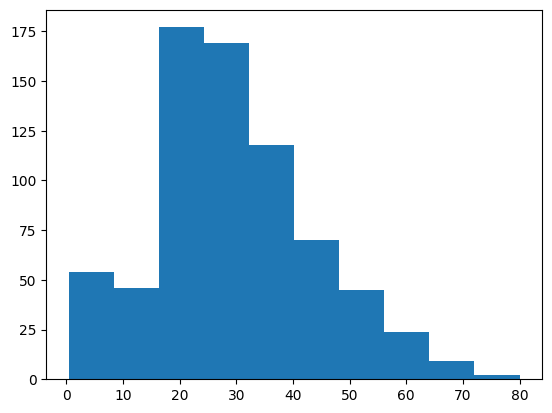

In [28]:
plt.hist(data['Age'].dropna())

In [29]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
data[data['Pclass']==1]['Age'].mean()
data[data['Pclass']==2]['Age'].mean()
data[data['Pclass']==3]['Age'].mean()

25.14061971830986

In [32]:
def inpute_missning(columns):
    age=columns[0]
    passenger_class=columns[1]
    
    if pd.isnull(age):
        if (passenger_class == 1):
            return data[data['Pclass']==1]['Age'].mean()
        elif(passenger_class==2):
            return data[data['Pclass']==2]['Age'].mean()
        elif (passenger_class==3):
            return data[data['Pclass']==3]['Age'].mean()
    else:
        return age

In [34]:
data['Age'] = data[['Age', 'Pclass']].apply(inpute_missning, axis = 1)

<AxesSubplot:>

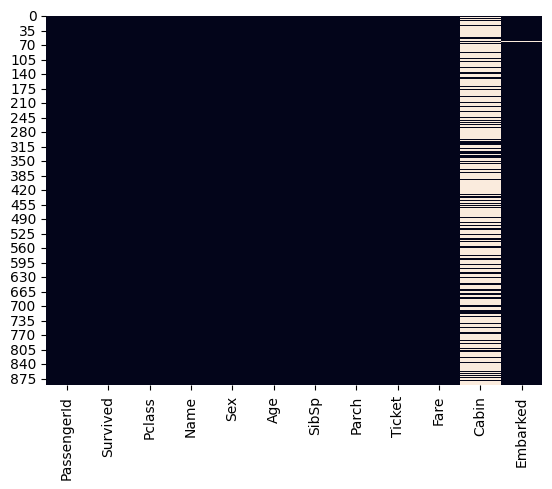

In [35]:
sns.heatmap(data.isnull(), cbar=False)

In [36]:
data.drop('Cabin', axis=1, inplace = True)

In [37]:
data.dropna(inplace = True)

In [39]:
pd.get_dummies(data['Sex'])
pd.get_dummies(data['Sex'], drop_first = True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
sex_data = pd.get_dummies(data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(data['Embarked'], drop_first = True)

data = pd.concat([data, sex_data, embarked_data], axis = 1)

In [43]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [44]:
data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [45]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
y_data = data['Survived']

x_data = data.drop('Survived', axis = 1)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(x_training_data, y_training_data)

C:\Users\João Eduardo Felipin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictions = model.predict(x_test_data)
print(predictions)

[0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 0 1 1 1 0]


In [55]:
from sklearn.metrics import classification_report

In [56]:
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.87      0.82       164\n           1       0.74      0.59      0.66       103\n\n    accuracy                           0.76       267\n   macro avg       0.76      0.73      0.74       267\nweighted avg       0.76      0.76      0.76       267\n'